In [26]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [27]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [28]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [29]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [30]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [31]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [32]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [33]:
# Create our session (link) from Python to the DB
session = Session (engine)

# Exploratory Precipitation Analysis

In [43]:
# Find the most recent date in the data set.
#inspector = inspect(engine)
#columns = inspector.get_columns('measurement')
#for c in columns:
    #print(c['name'], c["type"])
    
recent_date = engine.execute('SELECT MAX(date) FROM measurement').scalar()
recent_date

'2017-08-23'

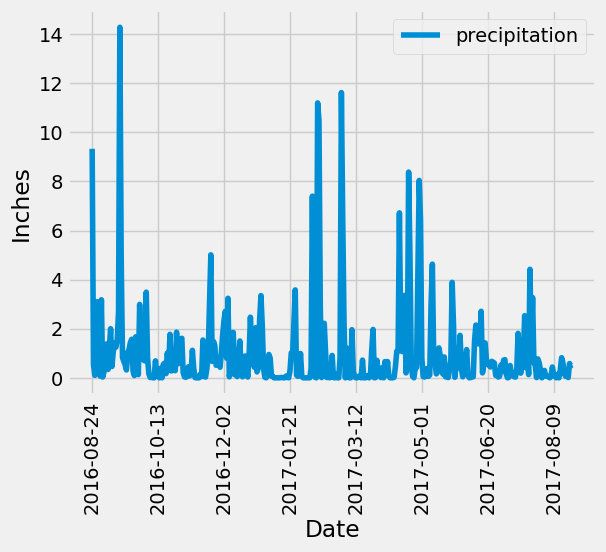

In [102]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
start_date = dt.datetime(2017, 8, 23)

# Calculate the date one year from the last date in data set.
one_year_before = date.replace(year=date.year-1)

# Perform a query to retrieve the data and precipitation scores
query = f"SELECT date, prcp FROM measurement WHERE date BETWEEN '{one_year_before}' AND '{start_date}'"

results = engine.execute(query).fetchall()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date', 'precipitation'])
groupby_df = df.groupby('date').sum()

# Sort the dataframe by date
groupby_df.sort_values(by='date', inplace=True)
groupby_df

# Use Pandas Plotting with Matplotlib to plot the data
groupby_df.plot()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.xticks(rotation = 90) 

# Show plot
plt.show()

In [62]:
# Use Pandas to calculate the summary statistics for the precipitation data
stats_df = df.describe()
stats_df

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [70]:
# Design a query to calculate the total number of stations in the dataset
result = engine.execute('SELECT COUNT(DISTINCT station) as total_stations FROM measurement;')
total_stations = result.fetchone()[0]
total_stations

9

In [71]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station)) \
                                .group_by(measurement.station) \
                                .order_by(func.count(measurement.station).desc()) \
                                .all()
for station, count in most_active_stations:
    print(station, count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [95]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tobs_results = session.query(func.min(measurement.tobs),
                             func.max(measurement.tobs),
                             func.avg(measurement.tobs)) \
                      .filter(measurement.station == 'USC00519281') \
                      .all()
tobs_results

[(54.0, 85.0, 71.66378066378067)]

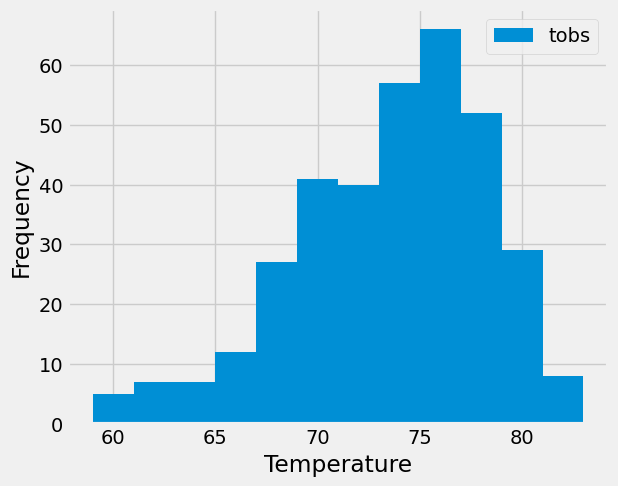

In [108]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query = f"SELECT tobs FROM measurement WHERE date BETWEEN '{one_year_before}' AND '{start_date}' AND station = 'USC00519281'"
results = engine.execute(query).fetchall()
tobs_df = pd.DataFrame(results, columns=['tobs'])
#final_df = tobs_df.groupby('tobs').count()
tobs_df.plot.hist(bins = 12)

#final_df.plot.bar()
#plt.xlabel('Temperature')
#plt.ylabel('Frequency')

# Show plot
plt.tight_layout()
plt.xlabel ('Temperature')                                 
plt.show()


# Close Session

In [16]:
# Close Session
session.close()